In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataLoc = "/home/tbrownex/data/Hackett/Boeing/"
file    = "2CES-PrimeJobswithHours.csv"

In [3]:
df = pd.read_csv(dataLoc+file)

In [4]:
keep = ['Division', 'Program', 'Description', 'Job ', 'RSC', 'Pool', 'ARG',
       'Scenario', 'Category', '2017 12 YTD']
df = df[keep]
df.rename(columns={"2017 12 YTD": "amount"}, inplace=True)

In [5]:
df["Category"].unique()

array(['Total Hours', 'Value (Thousands)'], dtype=object)

In [72]:
plan   = df.loc[df["Scenario"]=="LRBP2017_Final"]
actual = df.loc[df["Scenario"]=="LRBP2018_Final"]

In [73]:
# Get the Planned vs Actual hours
p1 = plan.loc[plan["Category"]=="Total Hours"]["amount"].sum()
a1 = actual.loc[actual["Category"]=="Total Hours"]["amount"].sum()
print("{:>24}{:>11}".format("Planned", "Actual"))
print("{:<17}{:<12,.0f}{:,.0f}".format("Hours",p1,a1 ))

p2 = plan.loc[plan["Category"]=="Value (Thousands)"]["amount"].sum()
a2 = actual.loc[actual["Category"]=="Value (Thousands)"]["amount"].sum()
print("{:<17}{:<12,.0f}{:,.0f}".format("Dollars (000s)",p2,a2 ))

print("{:<20}{:<12,.0f}{:,.0f}".format("Rate",p2/p1*1000,a2/a1*1000 ))

                 Planned     Actual
Hours            5,988,921   5,659,780
Dollars (000s)   558,696     529,029
Rate                93          93


In [75]:
plan.set_index("Program", inplace=True)
actual.set_index("Program", inplace=True)

In [76]:
p = np.unique(plan.index.values)
a = np.unique(actual.index.values)

common = [x for x in p if x in a]
diff   = [x for x in p if x not in a]

print("Programs with Plan but no Actual:")
for x in diff: print("  - ", x)

Programs with Plan but no Actual:
  -  BGS_AFS_Adjacents_R2019
  -  BGS_DLA_F18_R2019
  -  BGS_NonUSG_Intl Tanker_R2019
  -  BGS_Training Other_R2019


In [79]:
errors = []
hours = []
for pgm in common:
    p = plan.loc[pgm]["amount"].sum()
    a = actual.loc[pgm]["amount"].sum()
    v = abs(p-a)/p
    try:
        v.as_integer_ratio()
        hours.append(a)
        errors.append(v)
        if v >3:
            print(pgm, v)
    except:
        pass

BGS_Enterprise_R2018 5.351682083270013
Bombers_R2018 3.376579256235392
C32C40IFS 3.620424000626276
Missile_Support_History_R2018 3.420045787552009


/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0.5,1,'Program Actuals vs Predicted Pct Error')

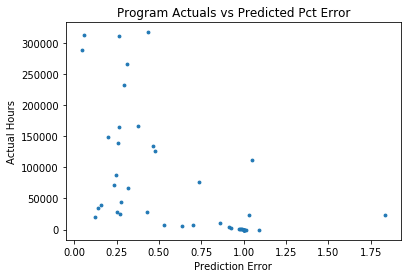

In [78]:
hours = pd.Series(hours)
errors = pd.Series(errors)

h = hours.loc[errors<3.0]
e = errors.loc[hours<320000]
h = h.loc[h<320000]
e = e.loc[e<3.0]

plt.scatter(e,h, s=8)
plt.xlabel("Prediction Error")
plt.ylabel("Actual Hours")
plt.title("Program Actuals vs Predicted Pct Error")

In [63]:
delim = ","
hdr = "Program"+delim+"Planned"+delim+"Actual"+delim+"Variance"+"\n"
with open("/home/tbrownex/BoeingReport.csv", "w") as f:
    f.write(hdr)
    for pgm in common:
        p = plan.loc[pgm]["amount"].sum()
        a = actual.loc[pgm]["amount"].sum()
        v = abs(p-a)/p
        rec = pgm+delim+str(round(p,2))+delim+str(round(a,2))+delim+str(round(v,2))+"\n"
        f.write(rec)

/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
